In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [33]:
os.chdir(os.path.join('..','data'))
df = pd.read_csv(r'2002FemPreg.csv',low_memory=False)
df = df[['caseid','prglngth','outcome','pregordr','birthord','totalwgt_lb','agepreg','finalwgt']]
df_live = df[df['outcome']==1]
# removing null values
df_no_nan = df_live[df_live['totalwgt_lb'].notnull()]

In [34]:
# divind the groups - first babies and others
first_babies = df_no_nan[df_no_nan['birthord']==1]
others = df_no_nan[df_no_nan['birthord']!=1]

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


0.027952778408273243

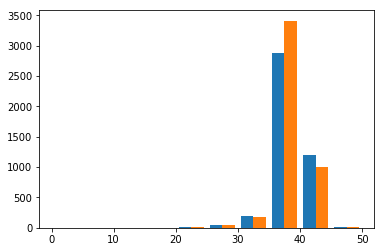

In [35]:
# do the babies arrive late
# check the preglength of both the groups
plt.hist([first_babies['prglngth'],others['prglngth']])

import math

def cohen_d(series1,series2):
    mean = series1.mean()-series2.mean()
    n1 = len(series1)
    n2 = len(series2)
    pooled_std = math.sqrt((n1*series1.var()+n2*series2.var())/(n1+n2))
    return mean/(pooled_std)

cohen_d(first_babies['prglngth'],others['prglngth'])
# the effect size is about 0.0288 weeks which is very small difference

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


-0.08867236333202932

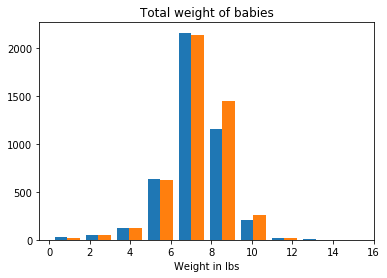

In [41]:
def compare(key):
    first_babies = df_no_nan[df_no_nan['birthord']==1]
    others = df_no_nan[df_no_nan['birthord']!=1]
    labels = ['first baby','others']
    series1,series2 = first_babies[key],others[key]
    plt.hist([series1,series2],label=labels)
    plt.title('Total weight of babies')
    plt.xlabel('Weight in lbs')
    diff = cohen_d(series1,series2)
    return diff

compare('totalwgt_lb')

# the difference is weight tells us the first babies that are born are lighter by 0.089 lbs than others